## PHYS 249 Lab \#10: Differential Equations and Chaos

(based on Newman 8.3, p. 347; see wikipedia for further discussion of the Lorenz system)

The Lorenz system is one of the most famous sets of differential equations in Physics. The system represents the time evolution of three different properties in an atmospheric layer driven to convection by warming from below and cooling from above. The equations are:

$$\frac{dx}{dt} = \sigma(y - x);\ \ \ \ \frac{dy}{dt} = rx - y - xz;\ \ \ \ \frac{dz}{dt} = xy - bz$$ 

where $\sigma$, $r$, and $b$ are constants. (In the original version, the functions x, y and z represent the convection rate, the horizontal temperature variation, and the vertical temperature variation respectively, although the equations can also describe to other physical systems.) 

In this lab, we will explore the surprising behaviour of these equations.

To solve these equations, we will use *Euler's method*. This amounts to using the Taylor series expansion:

$$f(t+\Delta t) \simeq f(x) + \Delta t\,f'(x)$$

to advance from $t$ to $t+\Delta t$. To do so, we need a way of calculating $f' = df/dt$, but this is exactly what the differential equation provides. We can also advance multiple functions simultaneously, evaluating all the derivatives at one point, moving forward, and the evaluating again.


1) Using the stub below, write a simple Euler solver to solve these differential equations. 

Then, for the constant values $σ = 10, r = 28, b = 8/3$, use your code to integrate forward in time, from the starting point $(x,y,z) = 0, 1, 0$, for $t = [0,50]$.

In [8]:
from numpy import array,arange
import matplotlib.pyplot as plt



#set constants - fill in values of sigma, r and b
sl = 10
rl = 28
bl = 8/3

#specify timestepping
a = 0.0
b = 50.0
N = 100000
h = (b-a)/N

# given a state vector r = (x,y,z) and a time t, this function calculates 
# the derivative vector dr/dt = (dx/dt,dy/dt,dz/dt)
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sl*(y-x)
    fy = rl*x - y - x*z
    fz = x*y - bl*z
    return array([fx,fy,fz],float)

# these arrays store *all* the values of t,x,y,z we go through as we integrate
# so we can easily plot things afterwards
tp = arange(a,b,h)
xp = []
yp = []
zp = []

# this array stores the state of the point (x(t),y(t),z(t)) as we advance t
r = array([0.0,1.0,0.0],float)


# need to put in code here to solve the DEs
t = a
while t < b:
    xp.append(r[0])
    yp.append(r[1])
    zp.append(r[2])
    dt = h
    r += dt * f(r, t)
    t += dt  
    


2) Given the code above, plot y(t) versus t. Then vary the starting point slightly (e.g. change y(0) slightly), recalculate the solution, and plot y(t) again. What do you notice?


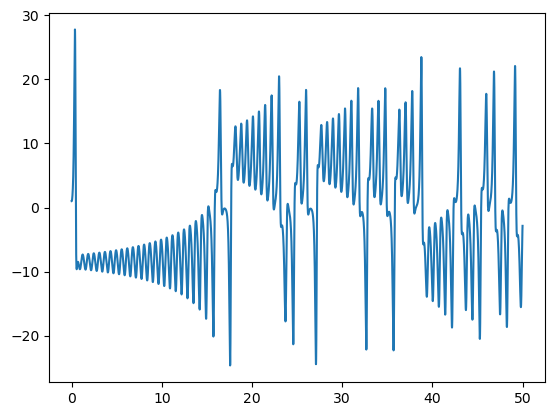

In [10]:
plt.plot(tp, yp)
plt.show()


3) Now, plot z vs x. What is interesting about the behaviour?

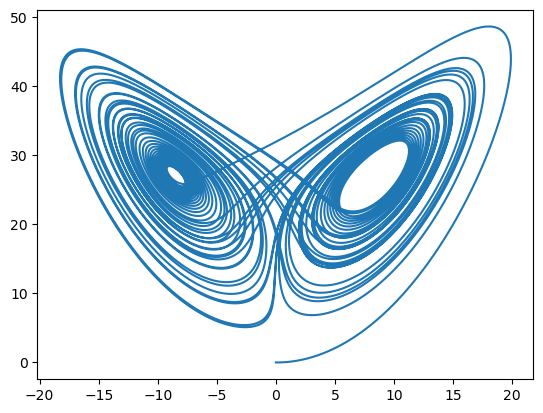

In [11]:
plt.plot(xp, zp)
plt.show()

4) Finally, you can make a 3D plot of x,y and z together. To do this, you can use the stub below. What is the dimensionality of the space spanned by the solution? 


In [15]:
%matplotlib qt

from numpy import array,arange
from pylab import plot, show, xlabel, ylabel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

#############################
sl = 10
rl = 28
bl = 8/3

#specify timestepping
a = 0.0
b = 50.0
N = 100000
h = (b-a)/N

# given a state vector r = (x,y,z) and a time t, this function calculates 
# the derivative vector dr/dt = (dx/dt,dy/dt,dz/dt)
def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sl*(y-x)
    fy = rl*x - y - x*z
    fz = x*y - bl*z
    return array([fx,fy,fz],float)

# these arrays store *all* the values of t,x,y,z we go through as we integrate
# so we can easily plot things afterwards
tp = arange(a,b,h)
xp = []
yp = []
zp = []

# this array stores the state of the point (x(t),y(t),z(t)) as we advance t
r = array([0.0,1.0,0.0],float)


# need to put in code here to solve the DEs
t = a
while t < b:
    xp.append(r[0])
    yp.append(r[1])
    zp.append(r[2])
    dt = h
    r += dt * f(r, t)
    t += dt  
    



#############################

# now plot results in 3D
ax.plot(xp, yp, zp)
xlabel("x")
ylabel("y")
show()
